<a href="https://colab.research.google.com/github/YatoCikss/MyProjects/blob/main/christopher_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jun 24 19:36:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
HOME = '/content/drive/MyDrive/AI'
DB_PATH = os.path.join(HOME,'PestDetection')
print(DB_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI/PestDetection


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


## Comandos Básicos

[Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/)

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### 🐍 Python SDK

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/drive/MyDrive/AI/turing.jpg', conf=0.25)


image 1/1 /content/drive/MyDrive/AI/turing.jpg: 640x512 1 person, 1 tie, 61.2ms
Speed: 3.2ms preprocess, 61.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[  1.1632,  26.4254, 599.1006, 750.0000],
        [318.9922, 545.6384, 440.3993, 749.7594]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.8974, 0.8128], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 27.], device='cuda:0')

**Dataset Personalizado**

Roboflow: https://app.roboflow.com

Exemplo:
https://www.kaggle.com/datasets/ashwingupta3012/human-faces

## Treinamento

In [8]:
!rm -rf {HOME}/runs/
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/AI/PestDetection/data.yaml epochs=75 imgsz=512 plots=True

/content/drive/MyDrive/AI
100% 21.5M/21.5M [00:00<00:00, 134MB/s] 
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/AI/PestDetection/data.yaml, epochs=75, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [9]:
!ls {HOME}/runs/detect/train/
!cp {HOME}/runs/detect/train/weights/best.pt {HOME}

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1687635755.6b4c40fc06cd.2039.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content/drive/MyDrive/AI


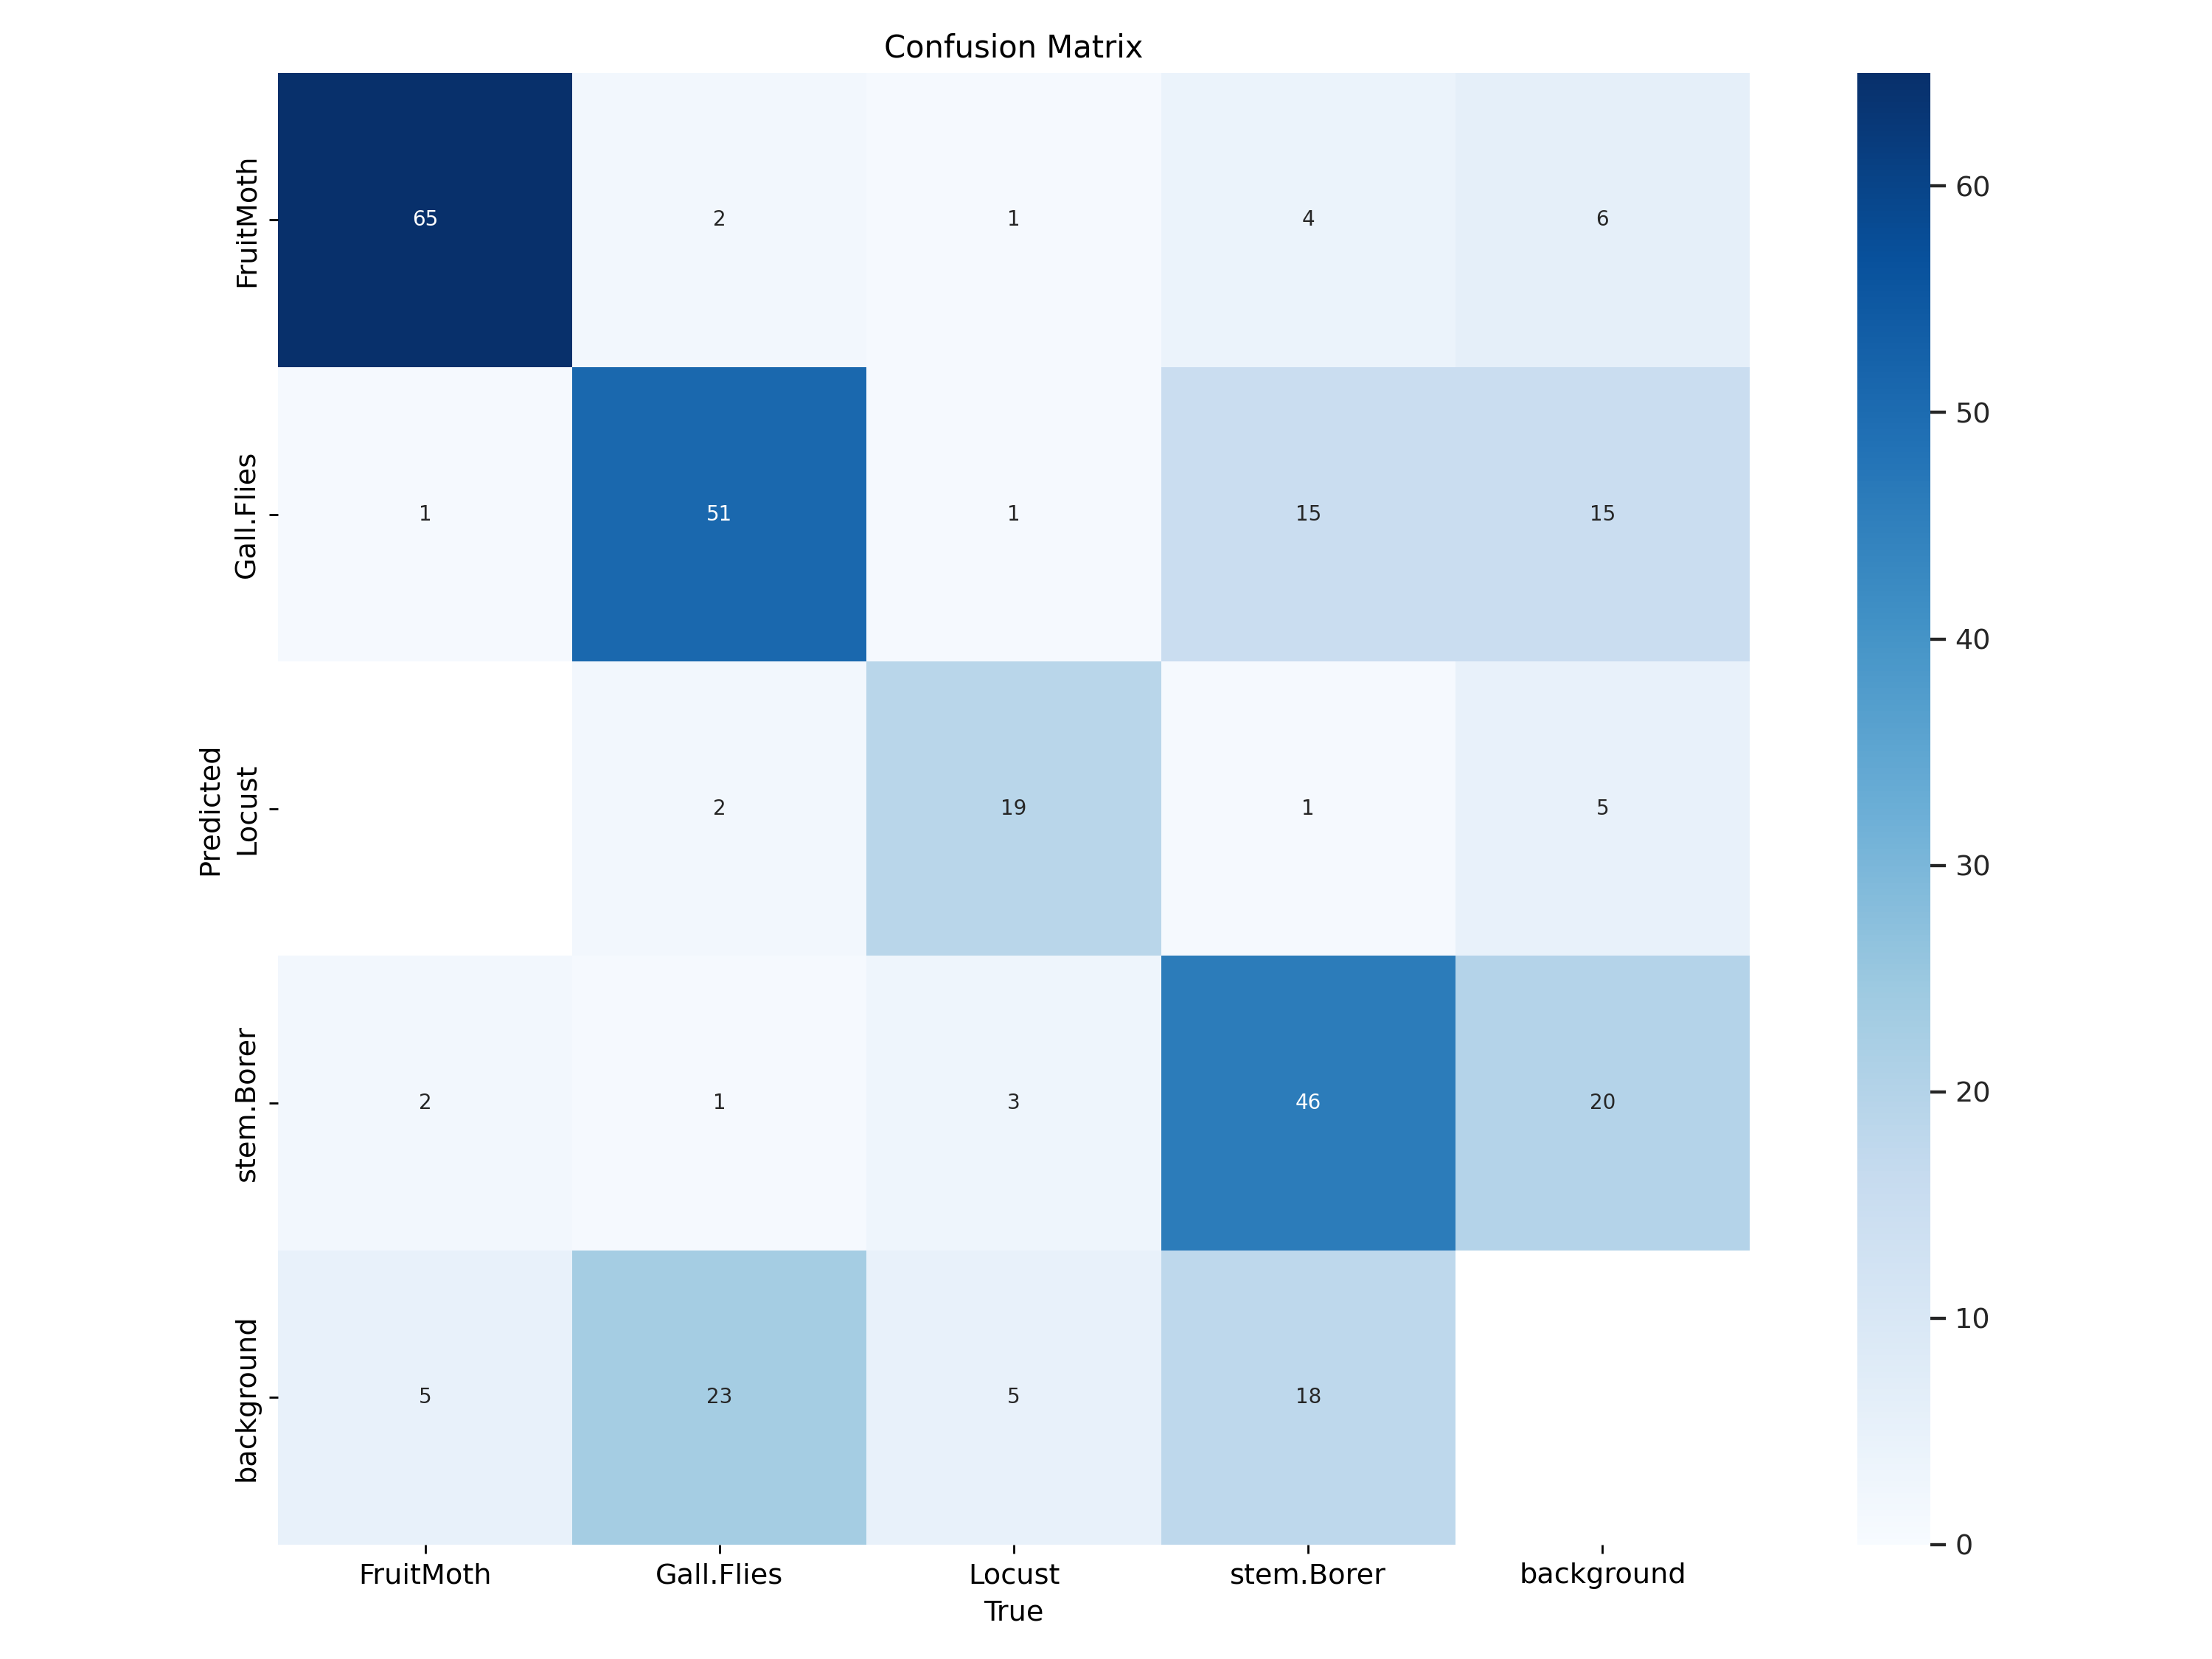

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/AI


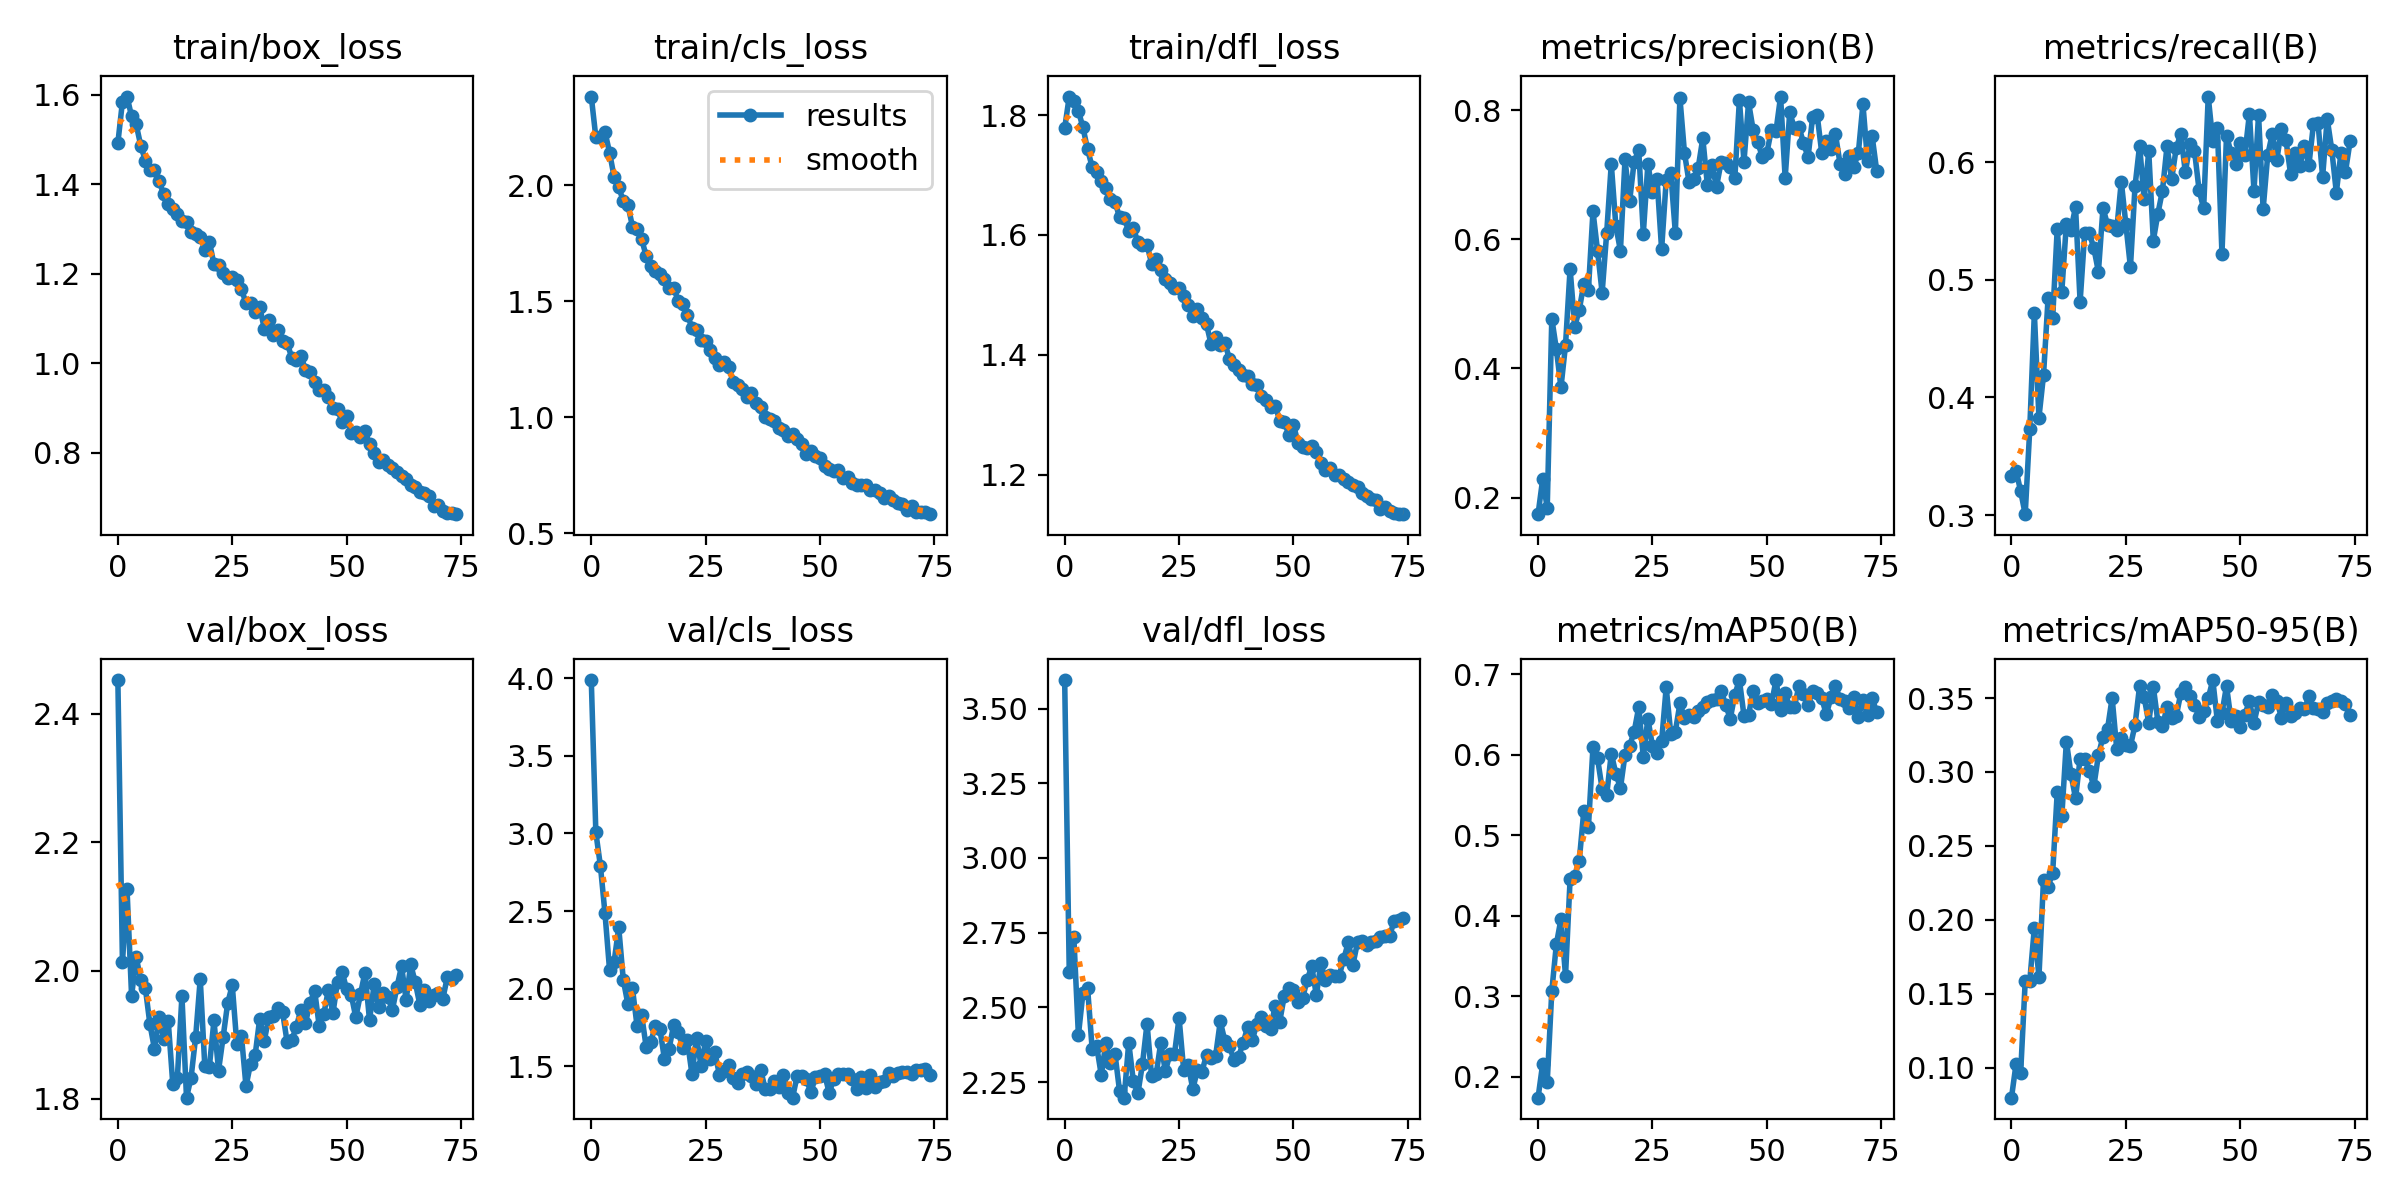

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

/content/drive/MyDrive/AI


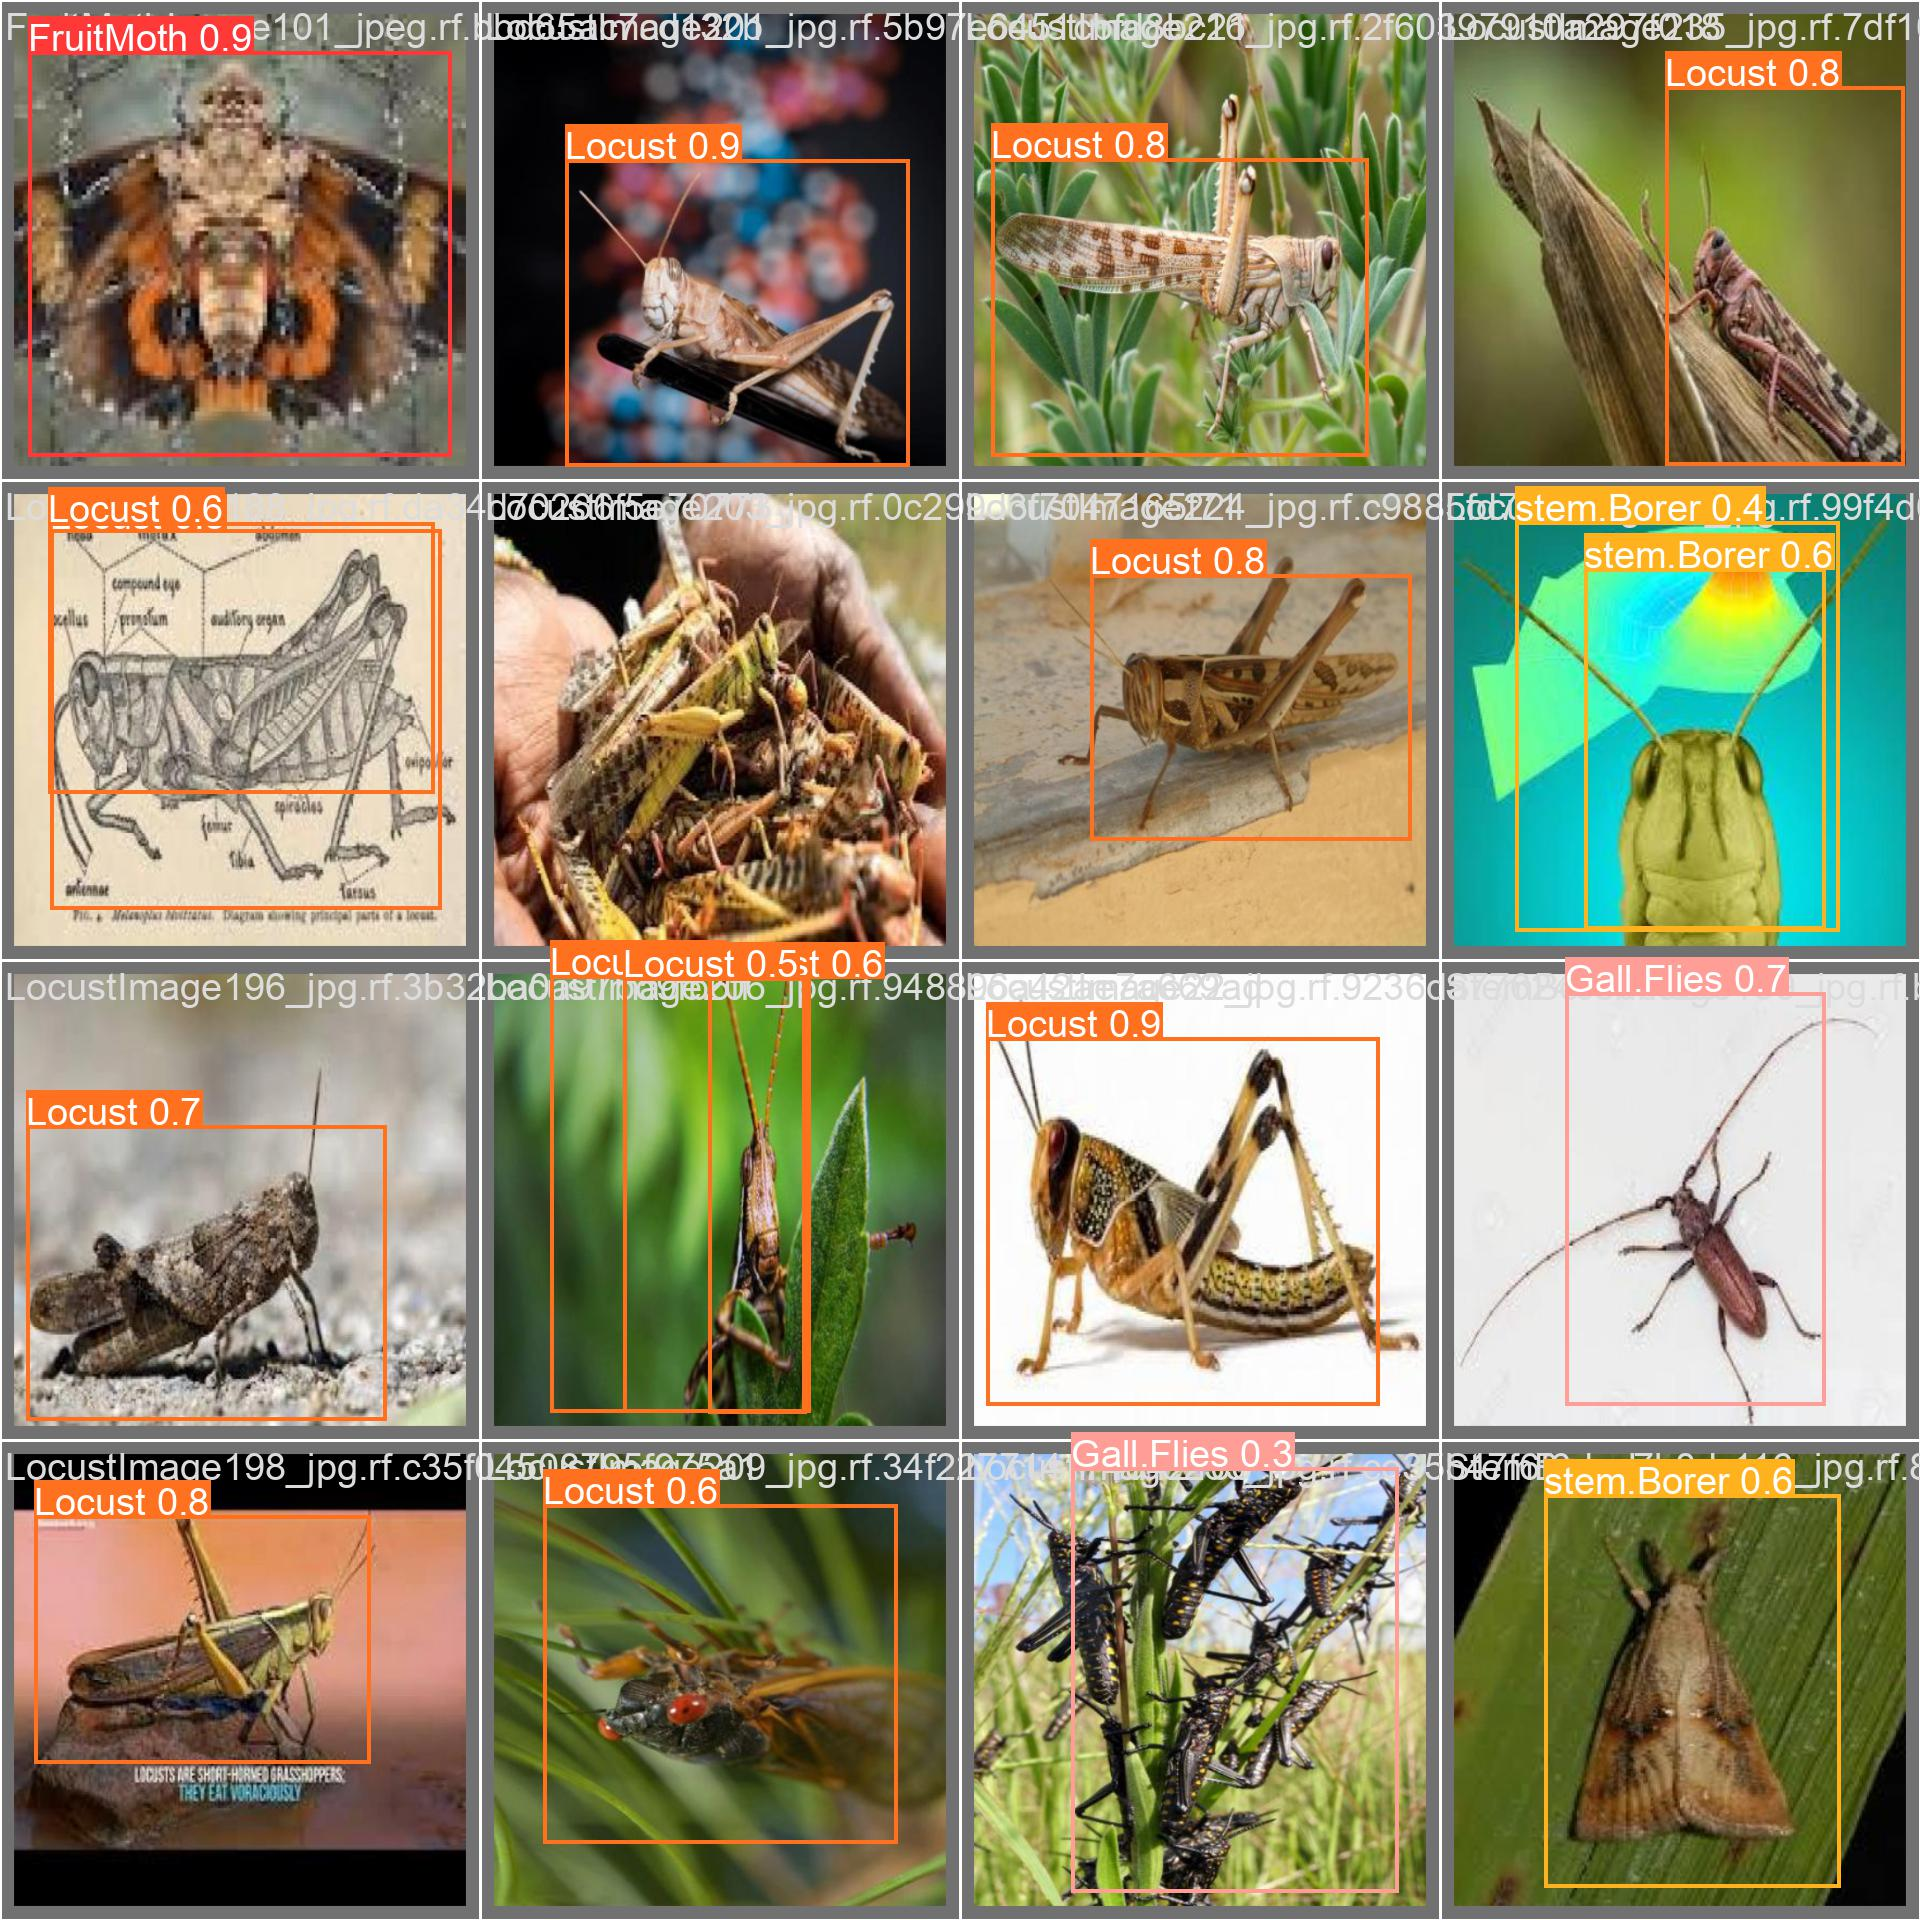

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=512)

## Validação

In [14]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/AI/PestDetection/data.yaml

/content/drive/MyDrive/AI
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/AI/PestDetection/valid/labels.cache... 266 images, 2 backgrounds, 0 corrupt: 100% 266/266 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.77it/s]
                   all        266        265      0.816      0.618      0.693      0.362
             FruitMoth        266         73      0.899      0.822      0.883      0.534
            Gall.Flies        266         79      0.714       0.57      0.595      0.321
                Locust        266         29      0.872      0.621      0.744      0.387
            stem.Borer        266         84      0.778      0.459      0.551      0.207
Speed: 1.1ms preprocess, 8.0ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs

## Inferencia

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/AI/PestDetection/test/images save=True

/content/drive/MyDrive/AI
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/135 /content/drive/MyDrive/AI/PestDetection/test/images/FruitMothImage108_jpeg.rf.d01036d5cc486a8e3b667af7d66dd2a5.jpg: 512x512 (no detections), 11.3ms
image 2/135 /content/drive/MyDrive/AI/PestDetection/test/images/FruitMothImage11_jpeg.rf.40ea73d23f728d351d1381874ade482d.jpg: 512x512 2 FruitMoths, 11.2ms
image 3/135 /content/drive/MyDrive/AI/PestDetection/test/images/FruitMothImage123_jpeg.rf.e58666d0999dd2f26ca382f52441239c.jpg: 512x512 1 FruitMoth, 11.2ms
image 4/135 /content/drive/MyDrive/AI/PestDetection/test/images/FruitMothImage124_jpeg.rf.4d27671787f5e29ede92d67b01142722.jpg: 512x512 1 FruitMoth, 11.1ms
image 5/135 /content/drive/MyDrive/AI/PestDetection/test/images/FruitMothImage13_jpeg.rf.e2e4617c01323b919daf7ff717491c00.jpg: 512x512 1 FruitMoth, 11.1ms
image 6/135 /content/drive/MyDrive

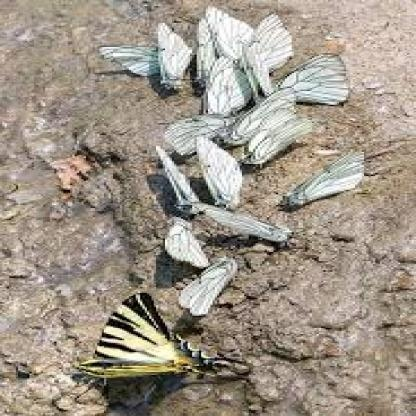

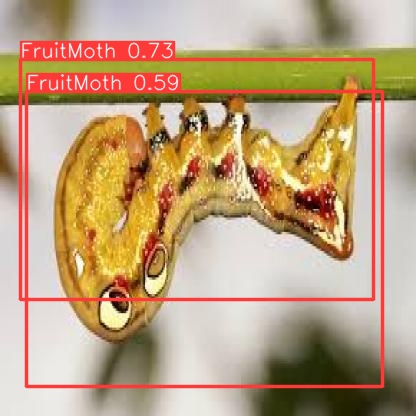

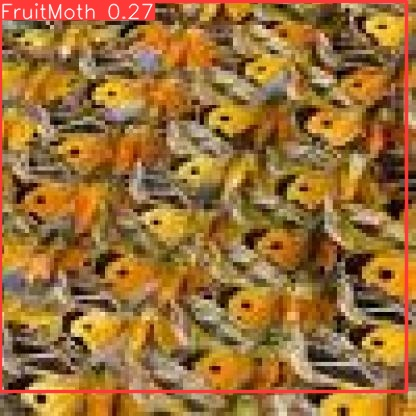

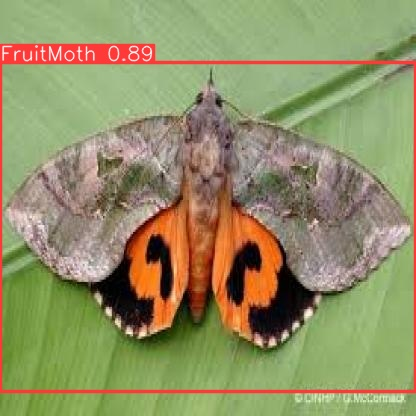

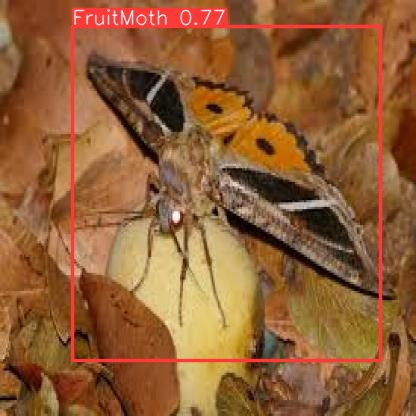

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=512))
      print("\n")

In [32]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.01 source='/content/drive/MyDrive/AI/PestDetection/gafanhoto.jpg' save=True
%cd {HOME}
Image(filename='runs/detect/predict2/gafanhoto.jpg', height=600)

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/AI/PestDetection/gafanhoto.jpg: 352x512 2 Locusts, 1 stem.Borer, 69.0ms
Speed: 1.4ms preprocess, 69.0ms inference, 108.9ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict4
/content/drive/MyDrive/AI


FileNotFoundError: ignored